In [55]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import poisson
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (3,2.5)
plt.rcParams['figure.dpi'] = 200
#plt.rcParams
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['font.family']='serif'

In [3]:
data = np.loadtxt('24-02-08-14-28.data')

In [4]:
data.shape

(436192, 2)

In [5]:
good_counts = []
bad_counts = 0

for item in data[:,0]:
    if item >= 40000:
        bad_counts += int(item - 40000)
    else:
        good_counts.append(item)
good_counts = np.asarray(good_counts)

In [6]:
len(good_counts)

10813

In [7]:
bad_counts

5628782

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


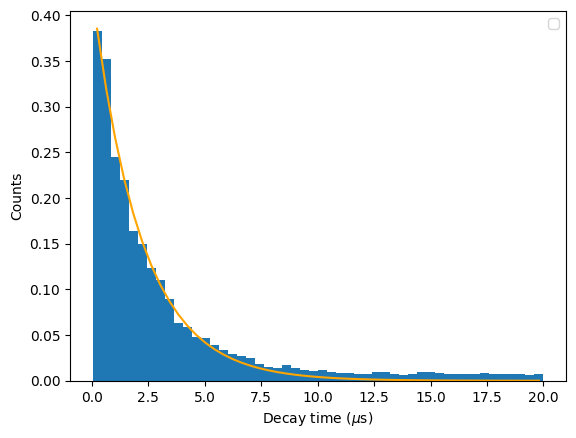

In [9]:
counts, bin_edges, fig = plt.hist(good_counts/1000, bins=50, density=True)
plt.xlabel('Decay time ($\mu$s)')
plt.ylabel('Counts')


#counts = counts/counts.max()
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

def exp(x, a, b):
    return a*np.exp(-b*x)

parameters, cov = curve_fit(exp, bin_centers, counts)

plt.plot(bin_centers, exp(bin_centers, *parameters), color='orange')
plt.legend()
plt.show()

In [10]:
print(parameters)

[0.43060911 0.46451375]


In [11]:
1/parameters[1]

2.1527888254449543

In [15]:
bin_centers[30]

12.215599999999998

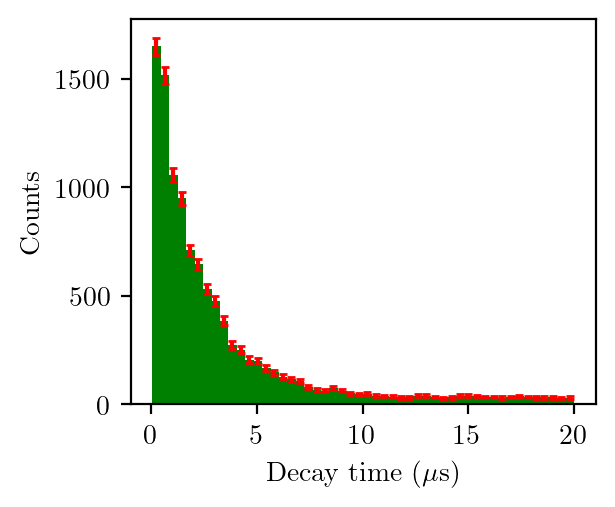

In [139]:
counts, bin_edges = np.histogram(good_counts/1000, bins=50)
yerr = np.sqrt(counts)

bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
binwidth = bin_edges[1]

plt.xlabel('Decay time ($\mu$s)')
plt.ylabel('Counts')
plt.bar(bin_centers, counts, color='green', yerr=yerr, capsize=1.5, ecolor='red', width = binwidth)#, edgecolor='black')
#plt.xlim(12,20)
#plt.ylim(0,50)

num=0
avg_bk = 0
avg_bk_err = 0
for i in range(30, len(counts)):
    num += 1
    avg_bk += counts[i]
    avg_bk_err += yerr[i]

avg_bk = avg_bk/num
avg_bk_error = avg_bk_err/num

[1651 1518 1057  949  709  646  532  475  385  273  252  206  201  167
  147  126  115  108   79   66   62   75   62   50   45   49   40   37
   35   31   31   39   40   34   28   31   39   39   37   32   34   30
   33   36   32   31   30   31   28   30]


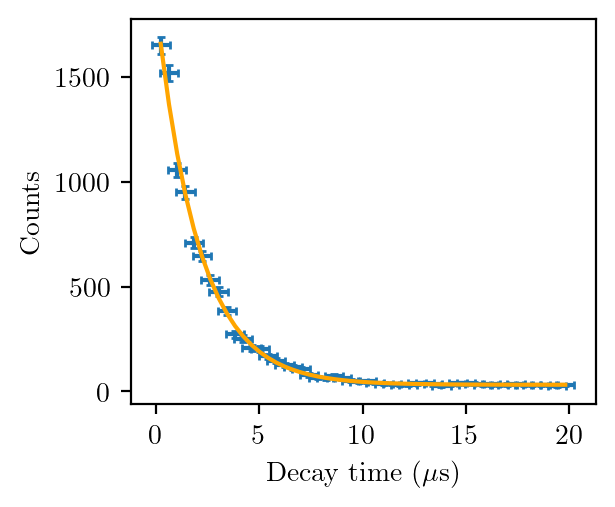

[1828.27876178   31.74763169    2.04484124]
[[ 1.10689702e+03  7.81464597e+00 -8.12210202e-01]
 [ 7.81464597e+00  1.70583837e+00 -1.87524897e-02]
 [-8.12210202e-01 -1.87524897e-02  1.09329326e-03]]


In [142]:
counts, bin_edges = np.histogram(good_counts/1000, bins=50)
plt.xlabel('Decay time ($\mu$s)')
plt.ylabel('Counts')
"""
counts = counts - avg_bk

rem_bk = np.zeros(len(counts), dtype='int')
for i in range(len(counts)):
    rem_bk[i] = counts[i] - avg_bk
    if rem_bk[i] < 0:
        rem_bk[i] = 0
        
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

print(sum(rem_bk))
hist = []
for i in range(len(rem_bk)):
    for j in range(rem_bk[i]):
        hist.append(bin_centers[i])

counts, bin_edges = np.histogram(hist, bins=bin_edges, density=True)
"""

def exp(x, a,b,t):
    return a*np.exp(-x/t) + b

parameters, cov = curve_fit(exp, bin_centers, counts, sigma=yerr)
print(counts)

plt.errorbar(bin_centers, counts, yerr=yerr, capsize=1.5, fmt=' ', xerr=binwidth)
#plt.scatter(bin_centers, counts, marker='.')
plt.plot(bin_centers, exp(bin_centers, *parameters), color='orange')

#plt.legend()
plt.show()
print(parameters)
print(cov)